In [36]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [21]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [37]:
RESULTS_FILEPATH = '../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = '../reports/figures/exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = '../reports/figures/nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [23]:
results_dict[2]['first']

{'X_array': array([0.11187551, 0.1258501 , 0.13065556, 0.13967755, 0.081838  ,
        0.14567366, 0.09874853, 0.13877979, 0.13426414, 0.1534769 ,
        0.08615439, 0.12426716, 0.17107768, 0.09459747, 0.08219951,
        0.11234823, 0.16962053, 0.11019294, 0.19781731, 0.06184731,
        0.08761354, 0.14874938, 0.0692531 , 0.09724578], dtype=float32),
 'Y_array': array([ 0.1513047 , -0.11470778, -0.08692707, -0.05852181, -0.24982475,
        -0.12160483, -0.07806452, -0.07864259,  0.06549993, -0.02181016,
        -0.13053733, -0.22230014, -0.06970428, -0.06751214, -0.29093254,
        -0.307059  , -0.2779437 , -0.23553266, -0.2918377 , -0.00573425,
        -0.12819189, -0.03295159, -0.06878892, -0.00608087], dtype=float32),
 'X_mean': 0.11974267,
 'Y_mean': -0.11368358,
 'threshold': 0.065379,
 'pct_5': 0,
 'pct_95': 0}

In [24]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Value')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [25]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [26]:
def add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                   mean_first, mean_second, pct_5_second, pct_95_second, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    FIRST_ORDER_COLOR = 'black'
    SECOND_ORDER_COLOR = 'red'
    SECOND_ORDER_PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_first)+1)]
    ax.scatter(arr_first, y, c=FIRST_ORDER_COLOR, s=S)
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    ax.axvline(threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.',label='first-order threshold')
    ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    ax.axvline(-threshold_first, c=FIRST_ORDER_COLOR, linestyle='-.')
    ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    ax.axvline(mean_first, c=FIRST_ORDER_COLOR, label='first-order mean')
    ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(-threshold_first, threshold_first, alpha=SHADE_DARKNESS, color='black')
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[ 0.08113076  0.18911934 -0.0954811   0.13401467  0.09897012  0.19287561
  0.11558053  0.06996465  0.12096066  0.12797187  0.11942707  0.18256408
  0.17806363  0.17999095  0.11687332  0.08817419  0.13236946  0.10520089
  0.17782208  0.09271343  0.14632878  0.13019669  0.14671066  0.15014505]
[-0.04801004 -0.06460989 -0.08932857 -0.06297787 -0.40200305 -0.1162259
  0.05139589 -0.29557508 -0.14763156  0.11352445 -0.1613886  -0.0787251
 -0.19676779 -0.14766207 -0.03967397  0.07359396 -0.04168847  0.08253389
 -0.0736915  -0.06181172  0.0839064   0.08104831  0.03454182 -0.13286161]
[0.11187551 0.1258501  0.13065556 0.13967755 0.081838   0.14567366
 0.09874853 0.13877979 0.13426414 0.1534769  0.08615439 0.12426716
 0.17107768 0.09459747 0.08219951 0.11234823 0.16962053 0.11019294
 0.19781731 0.06184731 0.08761354 0.14874938 0.0692531  0.09724578]
[ 0.1513047  -0.11470778 -0.08692707 -0.05852181 -0.24982475 -0.12160483
 -0.07806452 -0.07864259  0.06549993 -0.02181016 -0.13053733 -0.22230014
 

 30%|████████████████████████▉                                                          | 6/20 [00:00<00:00, 47.00it/s]

[ 0.00663948  0.02680787  0.02791426  0.03617187  0.09599918  0.04850574
  0.07949345 -0.04863115 -0.0444735   0.03286214 -0.14850953  0.01861319
  0.0077318   0.01474978  0.00566523  0.00490594  0.02165404]
[ 0.00988986  0.01115814  0.095567    0.00478411 -0.03889567  0.09273107
 -0.025709    0.0092452  -0.07201307 -0.06880713  0.104605    0.01453039
  0.06479049  0.02808368 -0.00976875  0.01884069 -0.05527768]
[ 0.04119465  0.05577091  0.06331062  0.01944469  0.10465929  0.10780068
  0.10657544 -0.01743984  0.03710333  0.10494243  0.08280779  0.11766191
  0.09724592  0.11059441  0.06998582  0.14013226  0.10533933]
[ 0.07358742  0.06519573  0.10762651  0.0118835   0.05736044  0.08980274
  0.05665222  0.00083162  0.04366809  0.07747671  0.05229287 -0.00498992
  0.08375244  0.16611624  0.04463285  0.01697422  0.05386306]
[-0.08004874 -0.05077918  0.01441437 -0.01782875  0.02026898 -0.04830749
  0.00148907  0.03717434]


 55%|█████████████████████████████████████████████                                     | 11/20 [00:00<00:00, 47.76it/s]

[-0.20753585 -0.24655825 -0.16689867 -0.32195958 -0.2542526  -0.21135706
 -0.21152043 -0.20141828]
[-0.03777    -0.01111573 -0.00301635 -0.00465037 -0.00110832 -0.0037257
 -0.00649728 -0.05348352]
[-0.14262517 -0.10875647 -0.14759968 -0.13094619 -0.16723022 -0.02748124
 -0.10132855 -0.09644441]
[-0.0169573  -0.00090333  0.00987627 -0.0253526  -0.01176235  0.00231038
 -0.03743968  0.01339002]
[-0.11513624 -0.05963063 -0.01614146 -0.11201927 -0.0795636  -0.11528738
 -0.01092793 -0.0678042 ]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 46.17it/s]

[-0.01844633 -0.10534403  0.00399658 -0.06343925 -0.09075728 -0.13986802]
[-0.22054353 -0.34067234 -0.4690128  -0.41603774 -0.3077197  -0.3245324 ]
[0.10225271 0.15678959 0.10749523 0.11887945 0.04136762 0.08816339
 0.07192403 0.07804854]
[0.1492859  0.16705547 0.13055772 0.07810615 0.08598709 0.04634924
 0.08980225 0.07212411]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.36it/s]


Rendering...


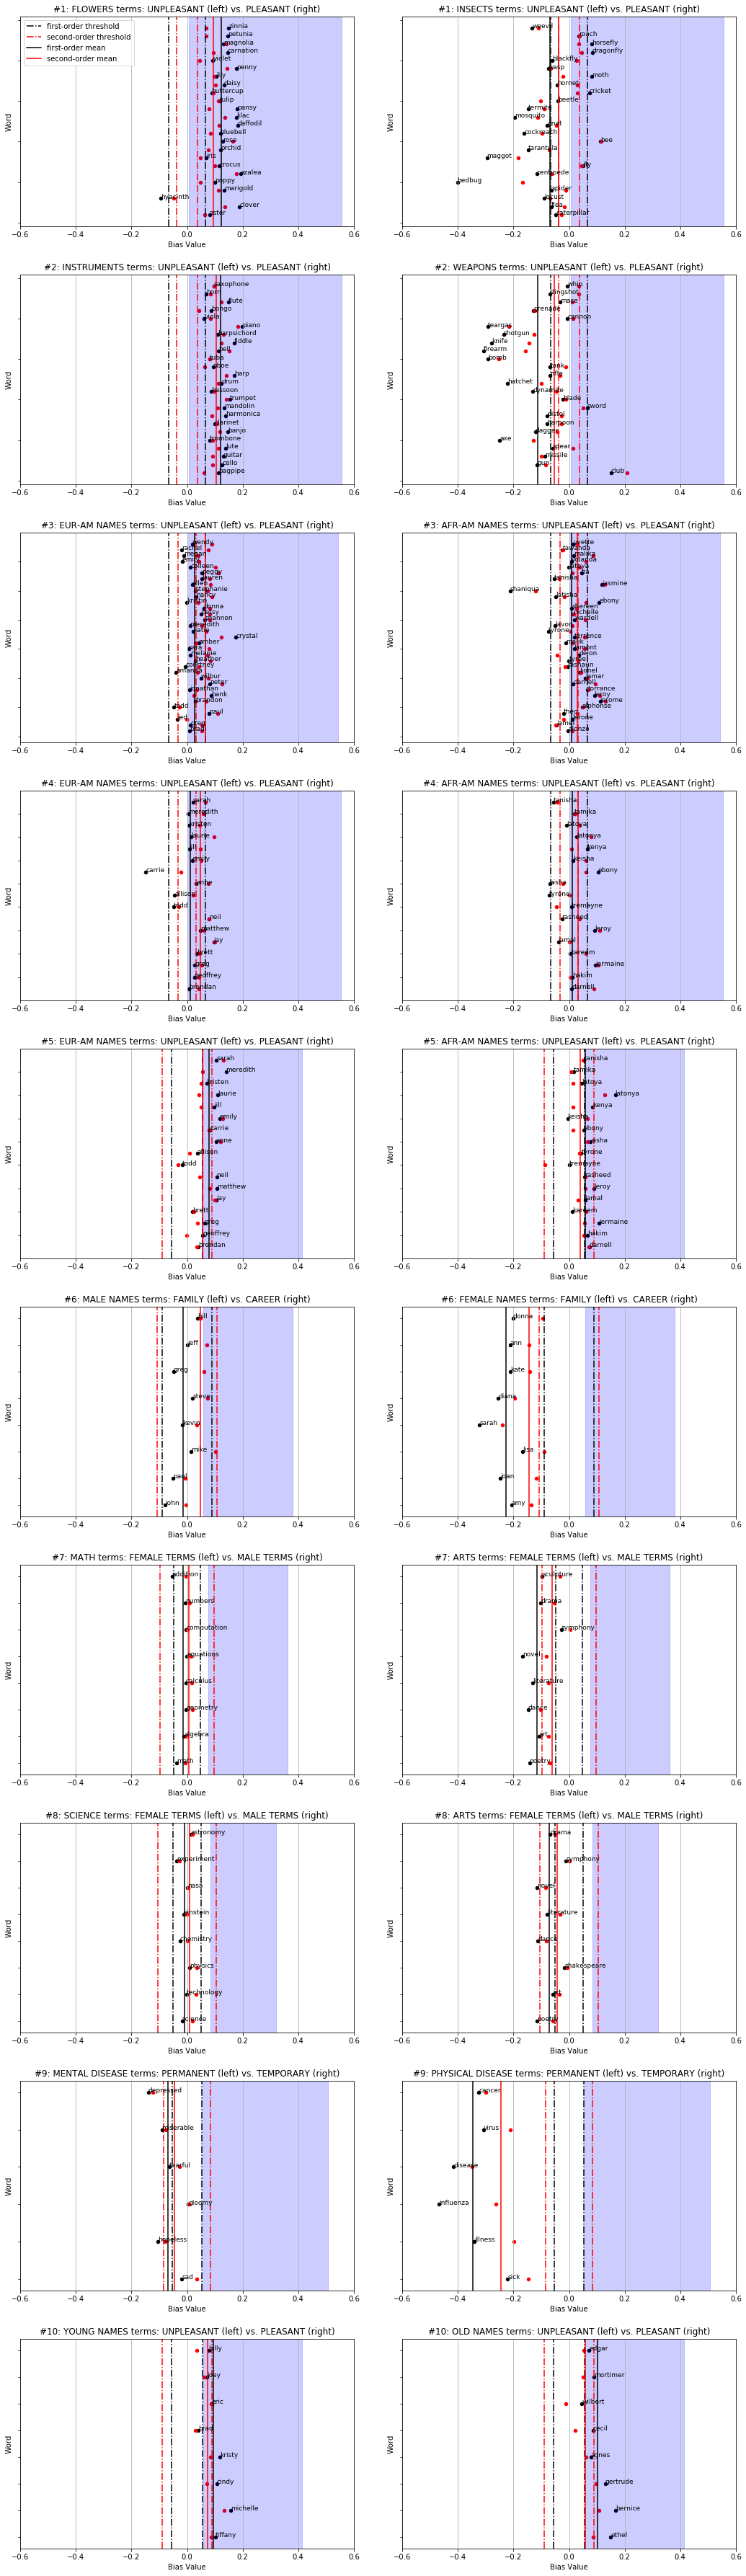

In [38]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    y = [i for i in range(1,len(arr_first)+1)]
    print(arr_first)
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, pct_5_second, pct_95_second, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()

In [26]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ['Exp Num', 'Target Labels', 'Attribute Labels']
print(len(exp_def_dict))
for i in range(1, len(exp_def_dict)+1):
    print(i)
    t.add_row([i, exp_def_dict[i]['X_label'] + ' vs. ' + exp_def_dict[i]['Y_label'], exp_def_dict[i]['A_label'] + ' vs. ' + exp_def_dict[i]['B_label']])
print(t)

10
1
2
3
4
5
6
7
8
9
10
+---------+-------------------------------------+-----------------------------+
| Exp Num |            Target Labels            |       Attribute Labels      |
+---------+-------------------------------------+-----------------------------+
|    1    |         Flowers vs. Insects         |   Pleasant vs. Unpleasant   |
|    2    |       Instruments vs. Weapons       |   Pleasant vs. Unpleasant   |
|    3    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    4    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    5    |    Eur-Am Names vs. Afr-Am Names    |   Pleasant vs. Unpleasant   |
|    6    |     Male Names vs. Female Names     |      Career vs. Family      |
|    7    |            Math vs. Arts            | Male Terms vs. Female Terms |
|    8    |           Science vs. Arts          | Male Terms vs. Female Terms |
|    9    | Mental Disease vs. Physical Disease |   Temporary vs. Permanent   |
|    10   |     

# Non-relative Biases

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[0.24636367 0.3360326  0.32783392 0.34475553 0.2964261  0.3219602
 0.42715466 0.33073768 0.37278342 0.42416668 0.3732654  0.21366799
 0.2673483  0.22172835 0.2853265  0.36145395 0.2938422  0.33583495
 0.22876093 0.31422225 0.36241674 0.30265492 0.39434937 0.28584054]
[0.24636367 0.3360326  0.32783392 0.34475553 0.2964261  0.3219602
 0.42715466 0.33073768 0.37278342 0.42416668 0.3732654  0.21366799
 0.2673483  0.22172835 0.2853265  0.36145395 0.2938422  0.33583495
 0.22876093 0.31422225 0.36241674 0.30265492 0.39434937 0.28584054]
[0.5008259  0.3699408  0.22995502 0.42247248 0.3397562  0.36337355
 0.25808394 0.32315367 0.5109651  0.29766297 0.44996813 0.44024473
 0.26912582 0.28023386 0.37395474 0.25299838 0.42247367 0.31099528
 0.3073465  0.385985   0.38600868 0.3566254  0.36788228 0.36334863]
[0.5008259  0.3699408  0.22995502 0.42247248 0.3397562  0.36337355
 0.25808394 0.32315367 0.5109651  0.29766297 0.44996813 0.44024473
 0.26912582 0.28023386 0.37395474 0.25299838 0.42247367 0.310

 25%|████████████████████▊                                                              | 5/20 [00:00<00:00, 49.91it/s]

[0.3944222  0.26990762 0.28146312 0.47441512 0.3927817  0.49069777
 0.46628323 0.34994268 0.43958095 0.32065752 0.43984947 0.23892266
 0.3690727  0.27333748 0.42441815 0.43523824 0.4423973  0.33516216
 0.28316173 0.3166422  0.3386161  0.36511853 0.40333164 0.36265072
 0.2976037  0.59314895 0.39043984 0.3308103  0.39909887 0.47525346
 0.46842024 0.32840914 0.4123957 ]
[0.4401426  0.40758857 0.39300704 0.422548   0.42401835 0.47288808
 0.37853423 0.27150398 0.33997792 0.51093006 0.40840536 0.46864495
 0.2940263  0.37291706 0.40625712 0.35360318 0.39283547]
[0.4401426  0.40758857 0.39300704 0.422548   0.42401835 0.47288808
 0.37853423 0.27150398 0.33997792 0.51093006 0.40840536 0.46864495
 0.2940263  0.37291706 0.40625712 0.35360318 0.39283547]
[0.41043445 0.36410475 0.3952404  0.3842376  0.38454098 0.40792322
 0.33905107 0.26729876 0.3341636  0.47874033 0.33722147 0.46421722
 0.22351082 0.33408272 0.38915044 0.31203657 0.40071142]
[0.41043445 0.36410475 0.3952404  0.3842376  0.38454098 0

 50%|█████████████████████████████████████████                                         | 10/20 [00:00<00:00, 48.81it/s]

[0.32131395 0.32361224 0.33565697 0.3402423  0.25615257 0.30759025
 0.34275684 0.308491  ]
[0.32131395 0.32361224 0.33565697 0.3402423  0.25615257 0.30759025
 0.34275684 0.308491  ]
[0.38380632 0.36233315 0.37253574 0.37974787 0.3501494  0.26110104
 0.42578775 0.33504853]
[0.38380632 0.36233315 0.37253574 0.37974787 0.3501494  0.26110104
 0.42578775 0.33504853]
[0.35381776 0.3435467  0.32874483 0.28977275 0.36788458 0.30623388
 0.2475726  0.35016537]
[0.35381776 0.3435467  0.32874483 0.28977275 0.36788458 0.30623388
 0.2475726  0.35016537]


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 49.44it/s]

[0.38893095 0.4691456  0.24035197 0.3165167  0.2876688  0.22467521]
[0.38893095 0.4691456  0.24035197 0.3165167  0.2876688  0.22467521]
[0.48986107 0.43047255 0.45799017 0.43227124 0.38485655 0.29719067
 0.33924606 0.38555047]
[0.48986107 0.43047255 0.45799017 0.43227124 0.38485655 0.29719067
 0.33924606 0.38555047]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.95it/s]


Rendering...


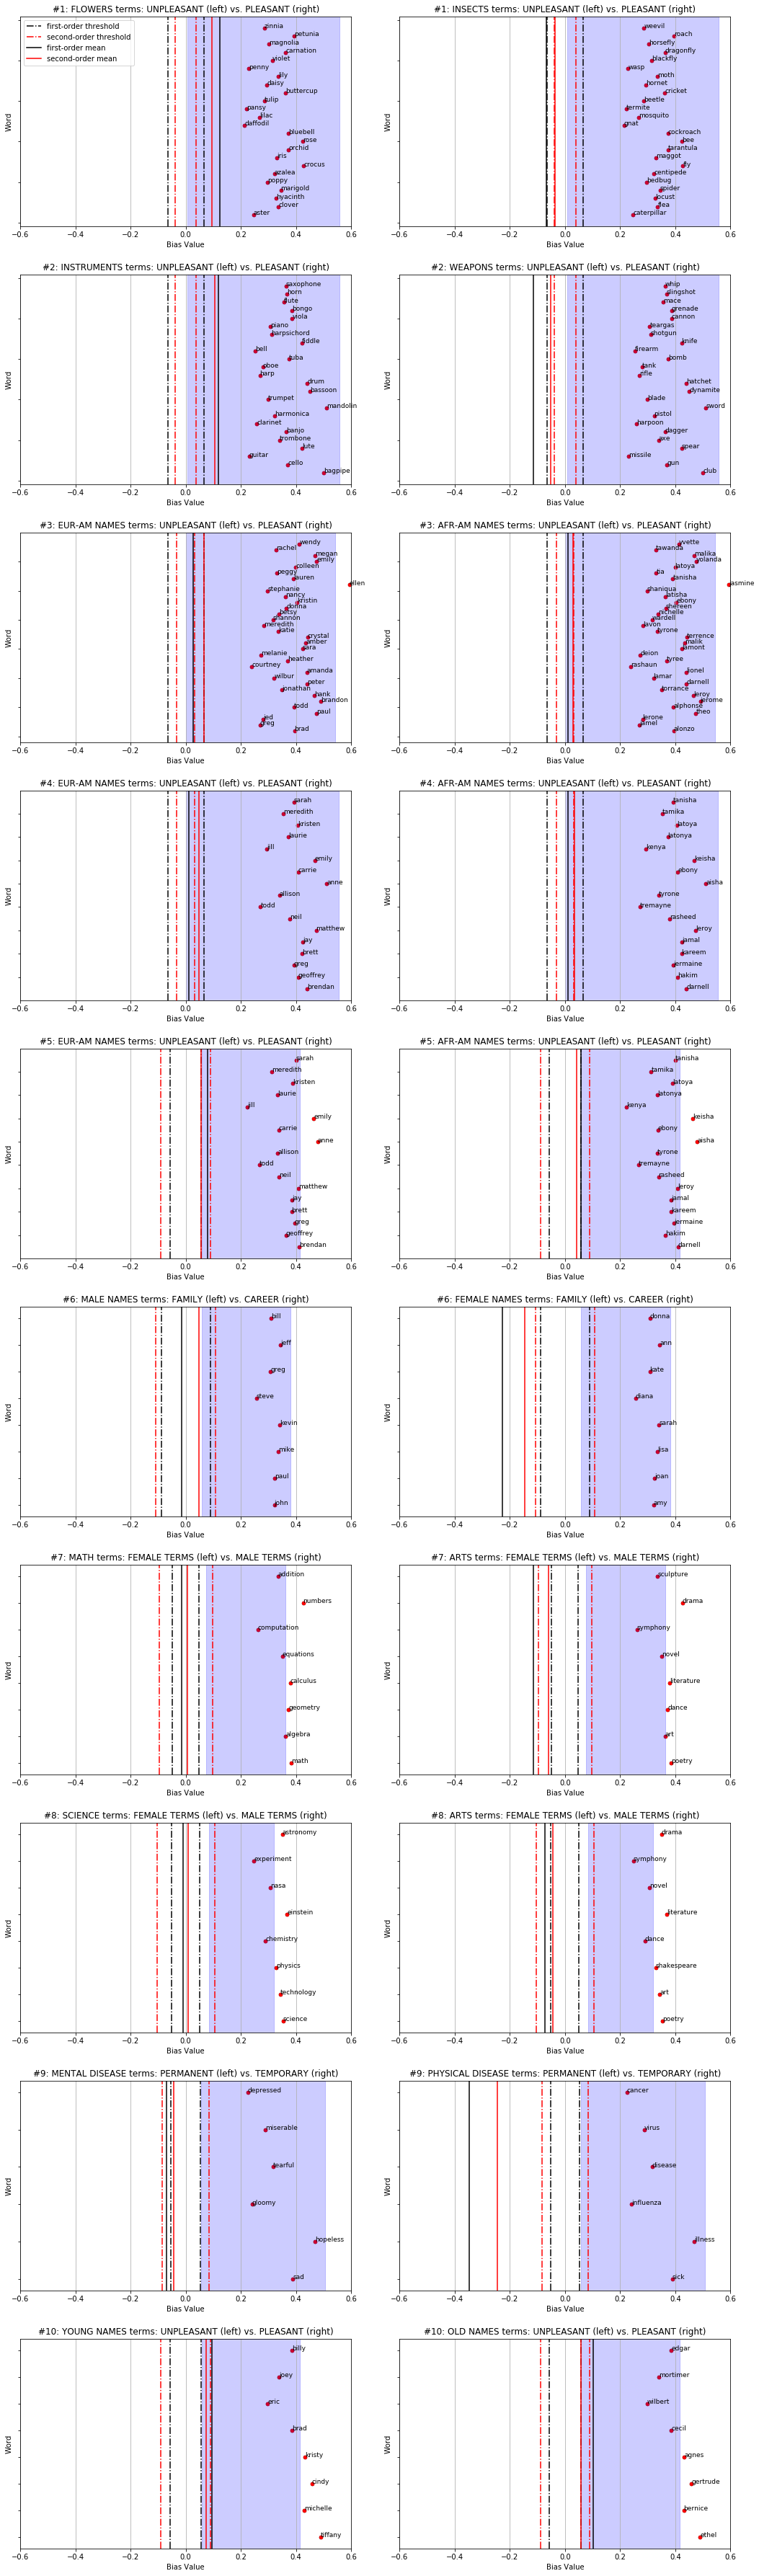

In [39]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    #arr_first = results_dict[exp_num]['first'][f'{target_letter}_array']
    #arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    arr_first = results_dict[exp_num]['second']['A_biases']
    arr_second = arr_first
    threshold_first = results_dict[exp_num]['first']['threshold']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_first = results_dict[exp_num]['first'][f'{target_letter}_mean']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    y = [i for i in range(1,len(arr_first)+1)]
    print(arr_first)
    
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_first, arr_second, threshold_first, threshold_second,
                    mean_first, mean_second, pct_5_second, pct_95_second, y)
    annotate_points(ax, terms, arr_first, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(NONRELATIVE_IMAGE_SAVE_FILEPATH)
plt.show()